# 1. PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [1]:
# Create your first MLP in Keras
from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd

In [2]:

seed = 7
np.random.seed(seed)
dataset= pd.read_csv('forestfires.csv')
dataset

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [4]:
dataset=dataset.drop(['month'], axis=1)
dataset

,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,...,0,0,0,0,1,0,0,0,0,small
1,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,...,0,0,0,0,0,0,0,1,0,small
2,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,...,0,0,0,0,0,0,0,1,0,small
3,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,...,0,0,0,0,1,0,0,0,0,small
4,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,...,0,0,0,0,0,0,0,0,0,large
513,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,...,0,0,0,0,0,0,0,0,0,large
514,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,...,0,0,0,0,0,0,0,0,0,large
515,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,...,0,0,0,0,0,0,0,0,0,small


In [5]:
dataset=dataset.drop(['day'], axis=1)
dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,small
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,small
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,small
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,large
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,large
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,large
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,small


In [6]:
dataset["size_category"].value_counts()
dataset.isnull().sum()
dataset.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
dataset.loc[dataset["size_category"]=='small','size_category']=0
dataset.loc[dataset["size_category"]=='large','size_category']=1
dataset

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,0
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,0
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,0
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,1
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,1
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,1
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 29 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FFMC           517 non-null    float64
 1   DMC            517 non-null    float64
 2   DC             517 non-null    float64
 3   ISI            517 non-null    float64
 4   temp           517 non-null    float64
 5   RH             517 non-null    int64  
 6   wind           517 non-null    float64
 7   rain           517 non-null    float64
 8   area           517 non-null    float64
 9   dayfri         517 non-null    int64  
 10  daymon         517 non-null    int64  
 11  daysat         517 non-null    int64  
 12  daysun         517 non-null    int64  
 13  daythu         517 non-null    int64  
 14  daytue         517 non-null    int64  
 15  daywed         517 non-null    int64  
 16  monthapr       517 non-null    int64  
 17  monthaug       517 non-null    int64  
 18  monthdec  

In [9]:
dataset["size_category"].value_counts()

0    378
1    139
Name: size_category, dtype: int64

In [10]:
dataset.shape

(517, 29)

In [11]:
dataset["size_category"] = dataset["size_category"].astype(str).astype(int)
print(dataset.dtypes)


FFMC             float64
DMC              float64
DC               float64
ISI              float64
temp             float64
RH                 int64
wind             float64
rain             float64
area             float64
dayfri             int64
daymon             int64
daysat             int64
daysun             int64
daythu             int64
daytue             int64
daywed             int64
monthapr           int64
monthaug           int64
monthdec           int64
monthfeb           int64
monthjan           int64
monthjul           int64
monthjun           int64
monthmar           int64
monthmay           int64
monthnov           int64
monthoct           int64
monthsep           int64
size_category      int32
dtype: object


In [12]:
X=dataset.iloc[:,:28]
Y=dataset['size_category']

<AxesSubplot:>

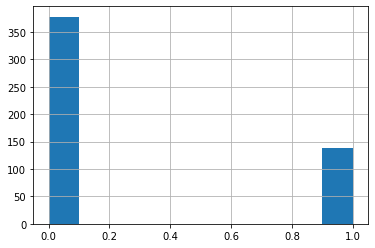

In [13]:
Y.hist()

array([[<AxesSubplot:title={'center':'FFMC'}>,
        <AxesSubplot:title={'center':'DMC'}>,
        <AxesSubplot:title={'center':'DC'}>,
        <AxesSubplot:title={'center':'ISI'}>,
        <AxesSubplot:title={'center':'temp'}>],
       [<AxesSubplot:title={'center':'RH'}>,
        <AxesSubplot:title={'center':'wind'}>,
        <AxesSubplot:title={'center':'rain'}>,
        <AxesSubplot:title={'center':'area'}>,
        <AxesSubplot:title={'center':'dayfri'}>],
       [<AxesSubplot:title={'center':'daymon'}>,
        <AxesSubplot:title={'center':'daysat'}>,
        <AxesSubplot:title={'center':'daysun'}>,
        <AxesSubplot:title={'center':'daythu'}>,
        <AxesSubplot:title={'center':'daytue'}>],
       [<AxesSubplot:title={'center':'daywed'}>,
        <AxesSubplot:title={'center':'monthapr'}>,
        <AxesSubplot:title={'center':'monthaug'}>,
        <AxesSubplot:title={'center':'monthdec'}>,
        <AxesSubplot:title={'center':'monthfeb'}>],
       [<AxesSubplot:title={'cen

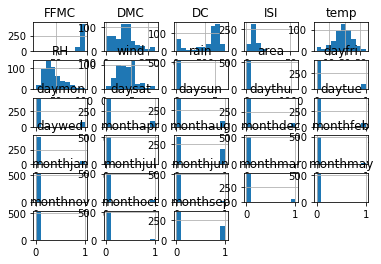

In [14]:
X.hist()

<AxesSubplot:>

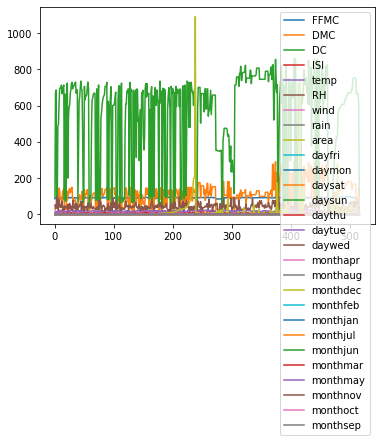

In [15]:
X.plot()

<AxesSubplot:>

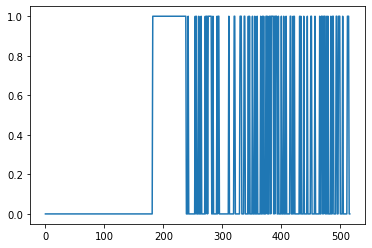

In [16]:
Y.plot()

In [14]:
# Standardization
from sklearn.preprocessing import StandardScaler
a = StandardScaler()
a.fit(X)
X_standardized = a.transform(X)

In [15]:
pd.DataFrame(X_standardized).describe()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
count,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,...,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02,5.170000e+02
mean,-1.754024e-15,3.070830e-16,7.387171e-17,-3.865380e-17,2.005703e-16,3.362881e-16,-2.676776e-16,-2.841054e-16,-1.274502e-16,4.874674e-17,...,7.179943e-16,-1.933764e-16,-2.260174e-17,1.352883e-17,1.169277e-16,2.265542e-16,-2.596515e-16,1.443075e-16,6.253326e-16,4.024290e-16
std,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,...,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00,1.000969e+00
min,-1.304582e+01,-1.715608e+00,-2.179108e+00,-1.980578e+00,-2.876943e+00,-1.796637e+00,-2.021098e+00,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
25%,-8.063453e-02,-6.606652e-01,-4.448281e-01,-5.535954e-01,-5.842379e-01,-6.924563e-01,-7.361236e-01,-7.326831e-02,-2.020198e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
50%,1.732292e-01,-4.020255e-02,4.691190e-01,-1.364774e-01,7.082076e-02,-1.403660e-01,-9.833712e-03,-7.326831e-02,-1.938429e-01,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,-7.060812e-01
75%,4.089598e-01,4.927389e-01,6.696628e-01,3.904086e-01,6.741643e-01,5.344111e-01,4.929823e-01,-7.326831e-02,-9.870852e-02,-4.435755e-01,...,-1.331035e-01,-2.006027e-01,-6.231770e-02,-2.568645e-01,-1.843909e-01,-3.415123e-01,-6.231770e-02,-4.402255e-02,-1.728597e-01,1.416268e+00
max,1.007353e+00,2.819865e+00,1.261610e+00,1.033538e+01,2.484195e+00,3.417549e+00,3.007063e+00,2.157228e+01,1.695111e+01,2.254407e+00,...,7.512952e+00,4.984977e+00,1.604681e+01,3.893103e+00,5.423261e+00,2.928152e+00,1.604681e+01,2.271563e+01,5.785038e+00,1.416268e+00


In [16]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.optimizers import Adam

In [17]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(28, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [18]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.6s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.5s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.8s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   1.3s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   2.4s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10

[CV 2/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.8s
[CV 3/5; 8/9] START batch_size=40, epochs=50....................................
[CV 3/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.6s
[CV 4/5; 8/9] START batch_size=40, epochs=50....................................
[CV 4/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.9s
[CV 5/5; 8/9] START batch_size=40, epochs=50....................................
[CV 5/5; 8/9] END ..................batch_size=40, epochs=50; total time=   1.2s
[CV 1/5; 9/9] START batch_size=40, epochs=100...................................
[CV 1/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.7s
[CV 2/5; 9/9] START batch_size=40, epochs=100...................................
[CV 2/5; 9/9] END .................batch_size=40, epochs=100; total time=   2.0s
[CV 3/5; 9/9] START batch_size=40, epochs=100...................................
[CV 3/5; 9/9] END ..........

In [19]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.9225541353225708, using {'batch_size': 20, 'epochs': 100}
0.8954256892204284,0.05519570479452208 with: {'batch_size': 10, 'epochs': 10}
0.9071321845054626,0.05633013928505657 with: {'batch_size': 10, 'epochs': 50}
0.9128827571868896,0.04649427631529634 with: {'batch_size': 10, 'epochs': 100}
0.8605862617492676,0.06772954317462998 with: {'batch_size': 20, 'epochs': 10}
0.908999252319336,0.047160092218081075 with: {'batch_size': 20, 'epochs': 50}
0.9225541353225708,0.040981364866094605 with: {'batch_size': 20, 'epochs': 100}
0.843203890323639,0.07715694113758179 with: {'batch_size': 40, 'epochs': 10}
0.8935399532318116,0.047329614279388116 with: {'batch_size': 40, 'epochs': 50}
0.90711350440979,0.05296420493420298 with: {'batch_size': 40, 'epochs': 100}


In [20]:
#### Tuning of Hyperparameters:- Learning rate and Drop out rate
from keras.layers import Dropout

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(20,input_dim = 28,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 200,epochs = 10)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.5,0.4,0.7]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.5, learning_rate=0.001.......................
[CV 1/5; 1/9] END .....dropout_rate=0.5, learning_rate=0.001; total time=   1.1s
[CV 2/5; 1/9] START dropout_rate=0.5, learning_rate=0.001.......................
[CV 2/5; 1/9] END .....dropout_rate=0.5, learning_rate=0.001; total time=   2.1s
[CV 3/5; 1/9] START dropout_rate=0.5, learning_rate=0.001.......................
[CV 3/5; 1/9] END .....dropout_rate=0.5, learning_rate=0.001; total time=   0.9s
[CV 4/5; 1/9] START dropout_rate=0.5, learning_rate=0.001.......................
[CV 4/5; 1/9] END .....dropout_rate=0.5, learning_rate=0.001; total time=   1.4s
[CV 5/5; 1/9] START dropout_rate=0.5, learning_rate=0.001.......................
[CV 5/5; 1/9] END .....dropout_rate=0.5, learning_rate=0.001; total time=   1.9s
[CV 1/5; 2/9] START dropout_rate=0.5, learning_rate=0.01........................
[CV 1/5; 2/9] END ......dropout_rate=0.5, learnin

[CV 5/5; 2/9] END ......dropout_rate=0.5, learning_rate=0.01; total time=   1.4s
[CV 1/5; 3/9] START dropout_rate=0.5, learning_rate=0.1.........................
[CV 1/5; 3/9] END .......dropout_rate=0.5, learning_rate=0.1; total time=   1.6s
[CV 2/5; 3/9] START dropout_rate=0.5, learning_rate=0.1.........................
[CV 2/5; 3/9] END .......dropout_rate=0.5, learning_rate=0.1; total time=   1.1s
[CV 3/5; 3/9] START dropout_rate=0.5, learning_rate=0.1.........................
[CV 3/5; 3/9] END .......dropout_rate=0.5, learning_rate=0.1; total time=   1.5s
[CV 4/5; 3/9] START dropout_rate=0.5, learning_rate=0.1.........................
[CV 4/5; 3/9] END .......dropout_rate=0.5, learning_rate=0.1; total time=   1.3s
[CV 5/5; 3/9] START dropout_rate=0.5, learning_rate=0.1.........................
[CV 5/5; 3/9] END .......dropout_rate=0.5, learning_rate=0.1; total time=   1.4s
[CV 1/5; 4/9] START dropout_rate=0.4, learning_rate=0.001.......................
[CV 1/5; 4/9] END .....dropo

[CV 4/5; 4/9] END .....dropout_rate=0.4, learning_rate=0.001; total time=   1.1s
[CV 5/5; 4/9] START dropout_rate=0.4, learning_rate=0.001.......................
[CV 5/5; 4/9] END .....dropout_rate=0.4, learning_rate=0.001; total time=   1.2s
[CV 1/5; 5/9] START dropout_rate=0.4, learning_rate=0.01........................
[CV 1/5; 5/9] END ......dropout_rate=0.4, learning_rate=0.01; total time=   1.7s
[CV 2/5; 5/9] START dropout_rate=0.4, learning_rate=0.01........................
[CV 2/5; 5/9] END ......dropout_rate=0.4, learning_rate=0.01; total time=   1.2s
[CV 3/5; 5/9] START dropout_rate=0.4, learning_rate=0.01........................
[CV 3/5; 5/9] END ......dropout_rate=0.4, learning_rate=0.01; total time=   1.5s
[CV 4/5; 5/9] START dropout_rate=0.4, learning_rate=0.01........................
[CV 4/5; 5/9] END ......dropout_rate=0.4, learning_rate=0.01; total time=   1.0s
[CV 5/5; 5/9] START dropout_rate=0.4, learning_rate=0.01........................
[CV 5/5; 5/9] END ......drop

[CV 4/5; 6/9] END .......dropout_rate=0.4, learning_rate=0.1; total time=   0.9s
[CV 5/5; 6/9] START dropout_rate=0.4, learning_rate=0.1.........................
[CV 5/5; 6/9] END .......dropout_rate=0.4, learning_rate=0.1; total time=   1.4s
[CV 1/5; 7/9] START dropout_rate=0.7, learning_rate=0.001.......................
[CV 1/5; 7/9] END .....dropout_rate=0.7, learning_rate=0.001; total time=   1.5s
[CV 2/5; 7/9] START dropout_rate=0.7, learning_rate=0.001.......................
[CV 2/5; 7/9] END .....dropout_rate=0.7, learning_rate=0.001; total time=   1.5s
[CV 3/5; 7/9] START dropout_rate=0.7, learning_rate=0.001.......................
[CV 3/5; 7/9] END .....dropout_rate=0.7, learning_rate=0.001; total time=   1.5s
[CV 4/5; 7/9] START dropout_rate=0.7, learning_rate=0.001.......................
[CV 4/5; 7/9] END .....dropout_rate=0.7, learning_rate=0.001; total time=   1.1s
[CV 5/5; 7/9] START dropout_rate=0.7, learning_rate=0.001.......................
[CV 5/5; 7/9] END .....dropo

[CV 3/5; 8/9] END ......dropout_rate=0.7, learning_rate=0.01; total time=   1.7s
[CV 4/5; 8/9] START dropout_rate=0.7, learning_rate=0.01........................
[CV 4/5; 8/9] END ......dropout_rate=0.7, learning_rate=0.01; total time=   1.0s
[CV 5/5; 8/9] START dropout_rate=0.7, learning_rate=0.01........................
[CV 5/5; 8/9] END ......dropout_rate=0.7, learning_rate=0.01; total time=   1.5s
[CV 1/5; 9/9] START dropout_rate=0.7, learning_rate=0.1.........................
[CV 1/5; 9/9] END .......dropout_rate=0.7, learning_rate=0.1; total time=   1.2s
[CV 2/5; 9/9] START dropout_rate=0.7, learning_rate=0.1.........................
[CV 2/5; 9/9] END .......dropout_rate=0.7, learning_rate=0.1; total time=   1.4s
[CV 3/5; 9/9] START dropout_rate=0.7, learning_rate=0.1.........................
[CV 3/5; 9/9] END .......dropout_rate=0.7, learning_rate=0.1; total time=   1.8s
[CV 4/5; 9/9] START dropout_rate=0.7, learning_rate=0.1.........................
[CV 4/5; 9/9] END .......dro

In [21]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.734466016292572, using {'dropout_rate': 0.5, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.5, 'learning_rate': 0.001}
0.734466016292572,0.1537509780062806 with: {'dropout_rate': 0.5, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.5, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.4, 'learning_rate': 0.001}
0.7210044741630555,0.13120679055184203 with: {'dropout_rate': 0.4, 'learning_rate': 0.01}
0.7306198596954345,0.14247324961509483 with: {'dropout_rate': 0.4, 'learning_rate': 0.1}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.7, 'learning_rate': 0.001}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.7, 'learning_rate': 0.01}
0.7305825233459473,0.15435061319000673 with: {'dropout_rate': 0.7, 'learning_rate': 0.1}


In [22]:
#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Dense(28,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(20,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 200,epochs = 10)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform; total time=   3.6s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.2s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.9s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform; total time=   1.2s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform; total time=   2.1s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...................
[CV 1/5; 2/12] END .activation_function=softmax,

[CV 5/5; 2/12] END .activation_function=softmax, init=normal; total time=   1.6s
[CV 1/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 1/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.4s
[CV 2/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 2/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.4s
[CV 3/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 3/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.7s
[CV 4/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 4/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.2s
[CV 5/5; 3/12] START activation_function=softmax, init=zero.....................
[CV 5/5; 3/12] END ...activation_function=softmax, init=zero; total time=   1.9s
[CV 1/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 1/5; 4/12] END ...activa

[CV 4/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.0s
[CV 5/5; 4/12] START activation_function=relu, init=uniform.....................
[CV 5/5; 4/12] END ...activation_function=relu, init=uniform; total time=   1.7s
[CV 1/5; 5/12] START activation_function=relu, init=normal......................
[CV 1/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.2s
[CV 2/5; 5/12] START activation_function=relu, init=normal......................
[CV 2/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.4s
[CV 3/5; 5/12] START activation_function=relu, init=normal......................
[CV 3/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.3s
[CV 4/5; 5/12] START activation_function=relu, init=normal......................
[CV 4/5; 5/12] END ....activation_function=relu, init=normal; total time=   1.3s
[CV 5/5; 5/12] START activation_function=relu, init=normal......................
[CV 5/5; 5/12] END ....activ

[CV 4/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.1s
[CV 5/5; 6/12] START activation_function=relu, init=zero........................
[CV 5/5; 6/12] END ......activation_function=relu, init=zero; total time=   1.8s
[CV 1/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 1/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   0.9s
[CV 2/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 2/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.6s
[CV 3/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 3/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.4s
[CV 4/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 4/5; 7/12] END ...activation_function=tanh, init=uniform; total time=   1.4s
[CV 5/5; 7/12] START activation_function=tanh, init=uniform.....................
[CV 5/5; 7/12] END ...activa

[CV 3/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.6s
[CV 4/5; 8/12] START activation_function=tanh, init=normal......................
[CV 4/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.6s
[CV 5/5; 8/12] START activation_function=tanh, init=normal......................
[CV 5/5; 8/12] END ....activation_function=tanh, init=normal; total time=   1.2s
[CV 1/5; 9/12] START activation_function=tanh, init=zero........................
[CV 1/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.6s
[CV 2/5; 9/12] START activation_function=tanh, init=zero........................
[CV 2/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.3s
[CV 3/5; 9/12] START activation_function=tanh, init=zero........................
[CV 3/5; 9/12] END ......activation_function=tanh, init=zero; total time=   1.4s
[CV 4/5; 9/12] START activation_function=tanh, init=zero........................
[CV 4/5; 9/12] END ......act

[CV 3/5; 10/12] END activation_function=linear, init=uniform; total time=   1.2s
[CV 4/5; 10/12] START activation_function=linear, init=uniform..................
[CV 4/5; 10/12] END activation_function=linear, init=uniform; total time=   1.4s
[CV 5/5; 10/12] START activation_function=linear, init=uniform..................
[CV 5/5; 10/12] END activation_function=linear, init=uniform; total time=   1.1s
[CV 1/5; 11/12] START activation_function=linear, init=normal...................
[CV 1/5; 11/12] END .activation_function=linear, init=normal; total time=   1.5s
[CV 2/5; 11/12] START activation_function=linear, init=normal...................
[CV 2/5; 11/12] END .activation_function=linear, init=normal; total time=   1.1s
[CV 3/5; 11/12] START activation_function=linear, init=normal...................
[CV 3/5; 11/12] END .activation_function=linear, init=normal; total time=   1.3s
[CV 4/5; 11/12] START activation_function=linear, init=normal...................
[CV 4/5; 11/12] END .activat

[CV 2/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.4s
[CV 3/5; 12/12] START activation_function=linear, init=zero.....................
[CV 3/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.2s
[CV 4/5; 12/12] START activation_function=linear, init=zero.....................
[CV 4/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.4s
[CV 5/5; 12/12] START activation_function=linear, init=zero.....................
[CV 5/5; 12/12] END ...activation_function=linear, init=zero; total time=   1.1s


In [23]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7326549768447876, using {'activation_function': 'linear', 'init': 'uniform'}
0.5694174766540527,0.2686514946324045 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'softmax', 'init': 'zero'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'uniform'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'relu', 'init': 'zero'}
0.7132001399993897,0.13122338718611995 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7094846963882446,0.10886230557509569 with: {'activation_function': 'tanh', 'init': 'normal'}
0.7305825233459473,0.15435061319000673 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7326549768447876,0.11795652731312903 with: {'activat

In [24]:
#### Tuning of Hyperparameter :-Number of Neurons in activation layer
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 200,epochs = 10)

# Define the grid search parameters

neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 1/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   1.3s
[CV 2/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 2/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   1.4s
[CV 3/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 3/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   1.5s
[CV 4/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 4/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   0.9s
[CV 5/5; 1/9] START neuron1=4, neuron2=2........................................
[CV 5/5; 1/9] END ......................neuron1=4, neuron2=2; total time=   1.9s
[CV 1/5; 2/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 2/9] END ......................neuron1=4

[CV 5/5; 2/9] END ......................neuron1=4, neuron2=4; total time=   1.6s
[CV 1/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   1.1s
[CV 2/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 2/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.0s
[CV 3/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 3/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.1s
[CV 4/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 4/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   2.5s
[CV 5/5; 3/9] START neuron1=4, neuron2=8........................................
[CV 5/5; 3/9] END ......................neuron1=4, neuron2=8; total time=   3.2s
[CV 1/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 1/5; 4/9] END ..........

[CV 4/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   1.9s
[CV 5/5; 4/9] START neuron1=8, neuron2=2........................................
[CV 5/5; 4/9] END ......................neuron1=8, neuron2=2; total time=   1.2s
[CV 1/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 1/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 2/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.7s
[CV 3/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 3/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.2s
[CV 4/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 4/5; 5/9] END ......................neuron1=8, neuron2=4; total time=   1.9s
[CV 5/5; 5/9] START neuron1=8, neuron2=4........................................
[CV 5/5; 5/9] END ..........

[CV 4/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   1.4s
[CV 5/5; 6/9] START neuron1=8, neuron2=8........................................
[CV 5/5; 6/9] END ......................neuron1=8, neuron2=8; total time=   0.9s
[CV 1/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 1/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.8s
[CV 2/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 2/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.1s
[CV 3/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 3/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.2s
[CV 4/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 4/5; 7/9] END .....................neuron1=16, neuron2=2; total time=   1.6s
[CV 5/5; 7/9] START neuron1=16, neuron2=2.......................................
[CV 5/5; 7/9] END ..........

[CV 3/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.9s
[CV 4/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 4/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.5s
[CV 5/5; 8/9] START neuron1=16, neuron2=4.......................................
[CV 5/5; 8/9] END .....................neuron1=16, neuron2=4; total time=   1.2s
[CV 1/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 1/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   2.2s
[CV 2/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 2/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.2s
[CV 3/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 3/5; 9/9] END .....................neuron1=16, neuron2=8; total time=   1.8s
[CV 4/5; 9/9] START neuron1=16, neuron2=8.......................................
[CV 4/5; 9/9] END ..........

In [25]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.734466016292572, using {'neuron1': 4, 'neuron2': 4}
0.7325242638587952,0.15400213076804797 with: {'neuron1': 4, 'neuron2': 2}
0.734466016292572,0.1537509780062806 with: {'neuron1': 4, 'neuron2': 4}
0.7305825233459473,0.15435061319000673 with: {'neuron1': 4, 'neuron2': 8}
0.7209297895431519,0.1537378788889947 with: {'neuron1': 8, 'neuron2': 2}
0.7131814658641815,0.15270931012094896 with: {'neuron1': 8, 'neuron2': 4}
0.7305825233459473,0.15916112736681773 with: {'neuron1': 8, 'neuron2': 8}
0.6960604786872864,0.08280163608155632 with: {'neuron1': 16, 'neuron2': 2}
0.7287714719772339,0.1155195932853835 with: {'neuron1': 16, 'neuron2': 4}
0.7286967873573303,0.14213084407037793 with: {'neuron1': 16, 'neuron2': 8}


In [26]:
#### Training model with optimum values of Hyperparameters
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Dense(16,input_dim = 28,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,input_dim = 16,kernel_initializer = 'uniform',activation = 'tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0,batch_size = 200,epochs = 10)

# Fitting the model

model.fit(X_standardized,Y)

# Predicting using trained model

y_predict = model.predict(X_standardized)

# Printing the metrics
print(accuracy_score(Y,y_predict))

C:\Users\Darshan\anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.7620889748549323


In [ ]:
# Hyperparameters all at once and process will take more time
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 28,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))
    
    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(build_fn = create_model,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.7,0.5,0.3]
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_standardized,Y)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Fitting 5 folds for each of 8748 candidates, totalling 43740 fits
[CV 1/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 1/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.3s
[CV 2/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 2/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2; total time=   2.8s
[CV 3/5; 1/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4, neuron2=2
[CV 3/5; 1/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=4

[CV 4/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.8s
[CV 5/5; 5/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4
[CV 5/5; 5/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=4; total time=   1.6s
[CV 1/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 1/5; 6/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8; total time=   1.9s
[CV 2/5; 6/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.001, neuron1=8, neuron2=8
[CV 2/5; 6/8748] END activation_fu

[CV 5/5; 10/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2; total time=   1.8s
[CV 1/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 1/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.5s
[CV 2/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 2/5; 11/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4; total time=   1.9s
[CV 3/5; 11/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=4, neuron2=4
[CV 3/5; 11/8748] END activation_f

[CV 1/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.5s
[CV 2/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 2/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   2.4s
[CV 3/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 3/5; 16/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2; total time=   1.7s
[CV 4/5; 16/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.01, neuron1=16, neuron2=2
[CV 4/5; 16/8748] END activa

[CV 2/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.8s
[CV 3/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 3/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.9s
[CV 4/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 4/5; 21/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8; total time=   1.5s
[CV 5/5; 21/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=4, neuron2=8
[CV 5/5; 21/8748] END activation_functio

[CV 3/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.3s
[CV 4/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 4/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 5/5; 26/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4
[CV 5/5; 26/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=4; total time=   1.9s
[CV 1/5; 27/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=uniform, learning_rate=0.1, neuron1=16, neuron2=8
[CV 1/5; 27/8748] END activation_f

[CV 4/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 5/5; 31/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2
[CV 5/5; 31/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.7s
[CV 1/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 1/5; 32/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4; total time=   2.1s
[CV 2/5; 32/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=8, neuron2=4
[CV 2/5; 32/8748] END activation_f

[CV 5/5; 36/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.001, neuron1=16, neuron2=8; total time=   2.0s
[CV 1/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   2.8s
[CV 2/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 37/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2; total time=   3.5s
[CV 3/5; 37/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 37/8748] END activation_funct

[CV 1/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.3s
[CV 2/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 2/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   2.1s
[CV 3/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 3/5; 42/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8; total time=   1.5s
[CV 4/5; 42/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.01, neuron1=8, neuron2=8
[CV 4/5; 42/8748] END activation_functio

[CV 2/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.7s
[CV 3/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 3/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   2.1s
[CV 4/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 4/5; 47/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4; total time=   1.6s
[CV 5/5; 47/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=4, neuron2=4
[CV 5/5; 47/8748] END activation_function=soft

[CV 3/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.3s
[CV 4/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 4/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.2s
[CV 5/5; 52/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2
[CV 5/5; 52/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=2; total time=   2.3s
[CV 1/5; 53/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=normal, learning_rate=0.1, neuron1=16, neuron2=4
[CV 1/5; 53/8748] END activation_functio

[CV 4/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   2.0s
[CV 5/5; 57/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8
[CV 5/5; 57/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=4, neuron2=8; total time=   1.6s
[CV 1/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 1/5; 58/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2; total time=   1.9s
[CV 2/5; 58/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=8, neuron2=2
[CV 2/5; 58/8748] END activation_function=soft

[CV 5/5; 62/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=4; total time=   1.9s
[CV 1/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 1/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.5s
[CV 2/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 2/5; 63/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8; total time=   1.9s
[CV 3/5; 63/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.001, neuron1=16, neuron2=8
[CV 3/5; 63/8748] END activation_functio

[CV 1/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.8s
[CV 2/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 2/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   1.5s
[CV 3/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 3/5; 68/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4; total time=   2.0s
[CV 4/5; 68/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.01, neuron1=8, neuron2=4
[CV 4/5; 68/8748] END activation_function=softmax, b

[CV 2/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   2.0s
[CV 3/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 3/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.4s
[CV 4/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 4/5; 73/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2; total time=   1.8s
[CV 5/5; 73/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=4, neuron2=2
[CV 5/5; 73/8748] END activation_function=softmax, batch_s

[CV 4/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   3.8s
[CV 5/5; 78/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8
[CV 5/5; 78/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=8, neuron2=8; total time=   2.0s
[CV 1/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 1/5; 79/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2; total time=   1.9s
[CV 2/5; 79/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=10, init=zero, learning_rate=0.1, neuron1=16, neuron2=2
[CV 2/5; 79/8748] END activation_function=softmax, batc

[CV 5/5; 83/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.6s
[CV 1/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 1/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.5s
[CV 2/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 2/5; 84/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8; total time=   3.4s
[CV 3/5; 84/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=4, neuron2=8
[CV 3/5; 84/8748] END activa

[CV 1/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.8s
[CV 2/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 2/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 3/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 3/5; 89/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4; total time=   3.5s
[CV 4/5; 89/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.001, neuron1=16, neuron2=4
[CV 4/5; 89/8748] END 

[CV 2/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.5s
[CV 3/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 3/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.4s
[CV 4/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 4/5; 94/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2; total time=   3.2s
[CV 5/5; 94/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=8, neuron2=2
[CV 5/5; 94/8748] END activation_f

[CV 3/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   4.4s
[CV 4/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 4/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.9s
[CV 5/5; 99/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8
[CV 5/5; 99/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.01, neuron1=16, neuron2=8; total time=   3.4s
[CV 1/5; 100/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=4, neuron2=2
[CV 1/5; 100/8748] END activa

[CV 4/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   6.4s
[CV 5/5; 104/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4
[CV 5/5; 104/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=4; total time=   6.2s
[CV 1/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 1/5; 105/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8; total time=   5.7s
[CV 2/5; 105/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=uniform, learning_rate=0.1, neuron1=8, neuron2=8
[CV 2/5; 105/8748] END activation_

[CV 5/5; 109/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=2; total time=   3.7s
[CV 1/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 1/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   4.0s
[CV 2/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 2/5; 110/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4; total time=   3.4s
[CV 3/5; 110/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=4, neuron2=4
[CV 3/5; 110/8748] END activ

[CV 1/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.5s
[CV 2/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 2/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   4.2s
[CV 3/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 3/5; 115/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2; total time=   3.7s
[CV 4/5; 115/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.001, neuron1=16, neuron2=2
[CV 4/5; 115/8748] END

[CV 2/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   2.9s
[CV 3/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 3/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.7s
[CV 4/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 4/5; 120/8748] END activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8; total time=   3.4s
[CV 5/5; 120/8748] START activation_function=softmax, batch_size=10, dropout_rate=0.7, epochs=50, init=normal, learning_rate=0.01, neuron1=4, neuron2=8
[CV 5/5; 120/8748] END activation_